In [1]:
import agent
import gym
import matplotlib.pyplot as plt
from tqdm import tqdm
import utils

### Environment

In [14]:
env = gym.make('MountainCar-v0')

### Agent

In [15]:
position_boundaries = (env.observation_space.low[0], env.observation_space.high[0])
velocity_boundaries = (env.observation_space.low[1], env.observation_space.high[1])

agent_init = {
    'discount_factor': 1, 
    'learning_rate': 0.5, 
    'epsilon': 0.000001,
    'num_action': env.action_space.n,
    'max_position_init': position_boundaries[0],
    'max_position_reward_bonus': 10,
    'trace_decay': 0.9,
    'eligibility_method': 'replace',
    'tile_coder': {
        'num_tiles': 8,
        'num_tilings': 20,
        'hash_size': 4096,
        'position_boundaries': position_boundaries, 
        'velocity_boundaries': velocity_boundaries
    }
}
sarsa_agent = agent.SarsaLambdaAgent(agent_init)

### RUN

In [23]:
timesteps_per_episode = list()
rewards_per_episode = list()

rewards_per_episode_array = np.array([])
timestep_per_episode_array = np.array([])

n_episode = 2000
t_max_per_episode = 200
graphical = True

In [24]:
for i_episode in tqdm(range(n_episode)):
    
    rewards = 0
    state = env.reset()
    next_action = sarsa_agent.episode_init(state)
    
    for t in range(t_max_per_episode):
        
        if graphical:
            env.render()
            
        state, reward, done, info = env.step(sarsa_agent.next_action)
        reward = sarsa_agent.max_position_reward_function(state[0], reward)
        next_action = sarsa_agent.update(state, reward, done)
        
        rewards += reward
        if done:
            break
            
    timesteps_per_episode.append(t)
    rewards_per_episode.append(rewards)
    
env.close()

  1%|          | 19/2000 [00:36<54:43,  1.66s/it]  

KeyboardInterrupt: 

In [25]:
env.close()

### ANALYSIS

In [21]:
timestep_per_episode_array = np.concatenate([timestep_per_episode_array, np.array(timesteps_per_episode)])
rewards_per_episode_array = np.concatenate([rewards_per_episode_array, np.array(rewards_per_episode)])
timestep_per_episode_array.min()

82.0

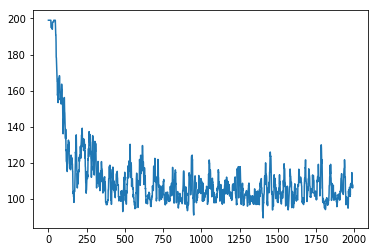

In [22]:
timesteps_per_episode_rolling_mean = utils.moving_average(timesteps_per_episode, n=10)
plt.plot(range(len(timesteps_per_episode_rolling_mean)), timesteps_per_episode_rolling_mean)

In [20]:
timesteps_per_episode.reshape(epoch_size, int(n_episode/epoch_size)).mean(axis=0)

AttributeError: 'list' object has no attribute 'reshape'

In [ ]:
plt.plot(range(n_episode), timesteps_per_episode)

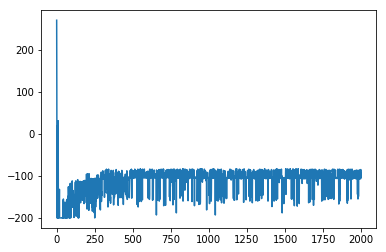

In [10]:
rewards_per_episode = np.array(rewards_per_episode)
plt.plot(range(n_episode), rewards_per_episode)

Rolling Average

In [12]:
timesteps_per_episode_rolling_mean = utils.moving_average(timesteps_per_episode, n=10)

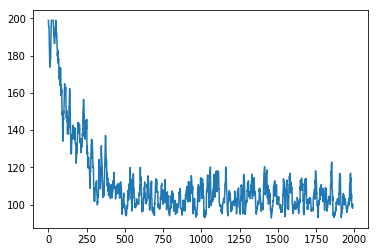

In [13]:
plt.plot(range(len(timesteps_per_episode_rolling_mean)), timesteps_per_episode_rolling_mean)